importo los numeros pseudo aleatorios


In [62]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog




# Ocultar la ventana principal de tkinter
root = tk.Tk()
root.withdraw()

# Abrir el diálogo para seleccionar archivo
file_path = filedialog.askopenfilename(
    title="Selecciona el archivo de números pseudoaleatorios",
    filetypes=[("Archivos CSV", "*.csv"), ("Todos los archivos", "*.*")]
)

# Verificar si se seleccionó un archivo
if file_path:
    # Cargar el archivo en un DataFrame
    df = pd.read_csv(file_path)

        # Definir la variable global
    global numeros_pseudoaletorios
    numeros_pseudoaletorios = df["N-pseudoaletorios-Normalisados"].values

    # Para compatibilidad con el resto del código, puedes asignar también:
    numeros = numeros_pseudoaletorios

    

else:
    print("No se seleccionó ningún archivo")


creamos la funcione papa valores de las variables

In [51]:
#MOCKUP HARDCODEADO FALTA DEFINIR LA FUNCION QUE GENERA LOS ARRIVOS
from scipy.stats import norm

def generar_intevalo_arribos(numero_aleatorio):
    """
    Genera una lista de n números pseudoaleatorios a partir de un número dado.
    """
    tiempo = norm.ppf(numero_aleatorio, 13.5, 2.86)
    
    return tiempo
    
    



In [52]:

from scipy.stats import norm

def generar_tiempo_indicacion(numero_pseudoaleatorio):
    """
    Genera un tiempo de indicacion aleatorio basado en los números pseudoaleatorios normalizados.
    """
    tiempo = norm.ppf(numero_pseudoaleatorio, 51.7, 21.1)
    return tiempo / 60  # Convertir a minutos


In [53]:
def generar_tiempo_rutina(numero_pseudoaleatorio):
    """
    Genera un tiempo de rutina aleatorio basado en los números pseudoaleatorios normalizados.
    """
    tiempo = 10.28 + 18.17 * numero_pseudoaleatorio 

    return tiempo 

SIMULACIOM

In [54]:
def simular_dia_tiempo_espera(cantidad_personas):
    global numeros_pseudoaletorios

    lista_eventos = []
    for i in range(cantidad_personas):
        numero_aleatorio = numeros_pseudoaletorios [i]
        tiempo_arribo = generar_intevalo_arribos(numero_aleatorio)
        numeros_pseudoaletorios  = numeros_pseudoaletorios [1:]  

        persona = tiempo_arribo
        lista_eventos.append(persona)
    
    # arracar simulación
    tiempo = 0 
    tiempo_final = 120  # 8 horas en minutos
    tiempo_entrenador = 0
    tiempo_espera_total = 0
    N  =    0

    cant_n = len(numeros_pseudoaletorios)
    while tiempo < tiempo_final and cant_n > 4:
        
        # Ordenar eventos por tiempo de arribo
        lista_eventos.sort()
        
        # Tomar el primer evento
        evento = lista_eventos.pop(0)
        tiempo_arribo= evento
        
        tiempo = tiempo_arribo

        if tiempo >= tiempo_entrenador:

            tiempo_inicio_atencion = tiempo

            tiempo_de_espera = 0

        else:
            tiempo_de_espera = tiempo_entrenador - tiempo

            tiempo_inicio_atencion = tiempo_entrenador

        tiempo_espera_total += tiempo_de_espera

        N += 1

        tiempo_indicacion = generar_tiempo_indicacion(numeros_pseudoaletorios[0])
        numeros_pseudoaletorios  = numeros_pseudoaletorios [1:]  # Eliminar el primer
        tiempo_entrenador = tiempo_indicacion + tiempo_inicio_atencion
        tiempo_rutina = generar_tiempo_rutina(numeros_pseudoaletorios[0])
        numeros_pseudoaletorios = numeros_pseudoaletorios[1:]  # Eliminar el primer

        
        prox_tiempo = tiempo + tiempo_de_espera + tiempo_indicacion + tiempo_rutina 
        lista_eventos.append(prox_tiempo)

        cant_n = len(numeros_pseudoaletorios)
            
    print(f"Tiempo de espera total: {tiempo_espera_total} minutos")
    print(f"Número de personas atendidas: {N}")
    print(f"Tiempo promedio de espera: {tiempo_espera_total/N} minutos")

    return tiempo_espera_total / N

    

In [55]:
#simular

simular_dia_tiempo_espera( 10)

Tiempo de espera total: 20.75235629064968 minutos
Número de personas atendidas: 57
Tiempo promedio de espera: 0.36407642615174873 minutos


np.float64(0.36407642615174873)

In [56]:
simular_dia_tiempo_espera( 12)

Tiempo de espera total: 47.80296295149449 minutos
Número de personas atendidas: 68
Tiempo promedio de espera: 0.7029847492866838 minutos


np.float64(0.7029847492866838)

In [57]:
simular_dia_tiempo_espera(16)

Tiempo de espera total: 57.62173075182736 minutos
Número de personas atendidas: 87
Tiempo promedio de espera: 0.6623187442738777 minutos


np.float64(0.6623187442738777)

Tiempo de espera total: 0.3644472478989016 minutos
Número de personas atendidas: 13
Tiempo promedio de espera: 0.028034403684530893 minutos
Tiempo de espera total: 0.3451638828552319 minutos
Número de personas atendidas: 13
Tiempo promedio de espera: 0.026551067911940916 minutos
Tiempo de espera total: 1.1039141086700113 minutos
Número de personas atendidas: 13
Tiempo promedio de espera: 0.08491646989769318 minutos
Tiempo de espera total: 0 minutos
Número de personas atendidas: 13
Tiempo promedio de espera: 0.0 minutos
Tiempo de espera total: 0.8782693767131562 minutos
Número de personas atendidas: 11
Tiempo promedio de espera: 0.07984267061028692 minutos
Tiempo de espera total: 0 minutos
Número de personas atendidas: 12
Tiempo promedio de espera: 0.0 minutos
Tiempo de espera total: 1.0916266710782452 minutos
Número de personas atendidas: 11
Tiempo promedio de espera: 0.09923878827984046 minutos
Tiempo de espera total: 0 minutos
Número de personas atendidas: 13
Tiempo promedio de esper

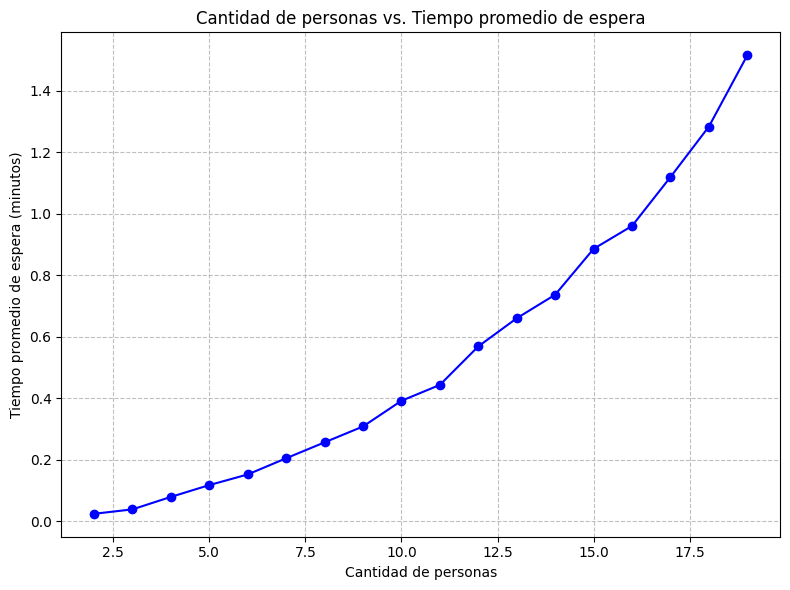

In [76]:
import matplotlib.pyplot as plt
import numpy as np

personas_range = range(2, 20)
promedios_espera = []

for i in personas_range:
    tiempos_espera = []
    for j in range(100):  # Puedes aumentar el número de simulaciones para mayor precisión
        tiempo_espera = simular_dia_tiempo_espera(i)
        tiempos_espera.append(tiempo_espera)
    promedio = np.mean(tiempos_espera)
    promedios_espera.append(promedio)

plt.figure(figsize=(8, 6))
plt.plot(personas_range, promedios_espera, marker='o', color='blue')
plt.title('Cantidad de personas vs. Tiempo promedio de espera')
plt.xlabel('Cantidad de personas')
plt.ylabel('Tiempo promedio de espera (minutos)')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()